## 課題1
行列演算の実行時間を考える

In [0]:
import numpy, sys, time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#sysを使うとなぜかクラッシュしてしまった(?)ので，nはinputするようにする．
#if (len(sys.argv) != 2):
#    print("usage: python %s N" % sys.argv[0])
#    quit()

#n = int(sys.argv[1])

#N=200とする．
N = int(input())
ns, for_time, numpy_time = [], [], []
for n in range(10, N+1, 10):
    a = numpy.zeros((n, n)) # Matrix A
    b = numpy.zeros((n, n)) # Matrix B
    c = numpy.zeros((n, n)) # Matrix C

    # Initialize the matrices to some values.
    for i in range(n):
      for j in range(n):
          a[i, j] = i * n + j
          b[i, j] = j * n + i
          c[i, j] = 0

    begin = time.time()

    ######################################################
    #普通に実装して時間を測る．
    for i in range(n):
      for j in range(n):
          for k in range(n):
              c[i, j] += a[i, k] * b[k, j]

    # Write code to calculate C = A * B                  #
    # (without using numpy librarlies e.g., numpy.dot()) #
    ######################################################

    end = time.time()
    #print("time: %.6f sec" % (end - begin))

    ######################################################
    #compare to numpy
    #numpyと比較してみる．
    begin2 = time.time()
    c = numpy.dot(a, b)
    end2 = time.time()
    #print("time: %.6f sec" % (end2 - begin2))
    ######################################################

    ns.append(n)
    for_time.append(round(end - begin, 6))
    numpy_time.append(round(end2 - begin2, 6))

# Print C for debugging. Comment out the print before measuring the execution time.
#total = 0
#for i in range(n):
#    for j in range(n):
#        # print c[i, j]
#        total += c[i, j]
# Print out the sum of all values in C.
# This should be 450 for N=3, 3680 for N=4, and 18250 for N=5.
#print("sum: %.6f" % total)

200


In [0]:
#データフレームで可視化
df = pd.DataFrame()
df['n'] = ns
df['for文での実行時間'] = for_time
df['numpyでの実行時間'] = numpy_time
df

,n,for文での実行時間,numpyでの実行時間
0,10,0.001321,0.000030
1,20,0.011191,0.000027
2,30,0.028778,0.000036
3,40,0.059122,0.000050
4,50,0.113602,0.000063
5,60,0.197940,0.000092
6,70,0.321131,0.000131
7,80,0.543846,0.000159
8,90,0.728282,0.000190
9,100,0.976149,0.000265


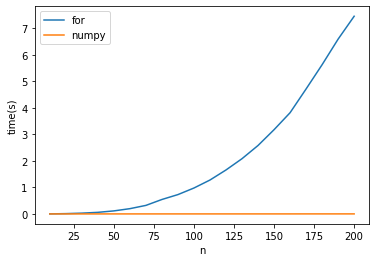

In [0]:
#numpyの計算はすごい！
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(df['n'], df['for文での実行時間'], label='for')
ax.plot(df['n'], df['numpyでの実行時間'], label='numpy')

ax.legend()
ax.set_xlabel("n")
ax.set_ylabel("time(s)")

plt.show()

In [0]:
#実行時間がn^2に比例していることの確認
consts = []
for i in range(len(ns)):
    consts.append(for_time[i]/(ns[i]**2))

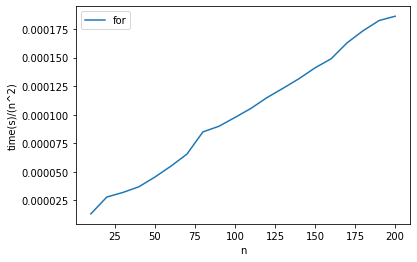

In [0]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(ns, consts, label='for')

ax.legend()
ax.set_xlabel("n")
ax.set_ylabel("time(s)/(n^2)")

plt.show()